In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date, date2index
from mpl_toolkits.basemap import Basemap
import datetime
import cftime

In [2]:
# Data file names
temp_filename = 'air.mon.mean.nc'
uwind_filename = 'uwnd.mon.mean.nc'
vwind_filename = 'vwnd.mon.mean.nc'

In [3]:
# Reading air temperature data
# Also grabbing month data was averaged over, latitude/longitude, and pressure levels
with Dataset(temp_filename, 'r') as rootgrp:
    # Getting air temperature data
    temps = np.array(rootgrp['air'][:])
    # Getting times and converting to a readable format
    times = np.array(rootgrp['time'][:])
    times = num2date(times=times, units=rootgrp['time'].units,
                     only_use_cftime_datetimes=True)
    # Getting latitude and longitude
    lat = np.array(rootgrp['lat'][:])
    lon = np.array(rootgrp['lon'][:])
    # Getting pressure levels
    levels = np.array(rootgrp['level'][:])
    # Getting index of a specified date
    date = cftime.datetime(2022, 7, 1)
    date_index = date2index(date, rootgrp['time'])
print(f'date_index is index in times for {date.strftime("%B")} of {date.year}')

date_index is index in times for July of 2022


A quick note: `date_index` is the index in `times` corresponding to July 2022. We will look at this month to explore the heat transfer into the antarctic circle as a function of pressure.

In [4]:
# Reading u-wind data
with Dataset(uwind_filename, 'r') as rootgrp:
    # Getting uwind data
    uwind = np.array(rootgrp['uwnd'][:])

In [5]:
# Reading v-wind data
with Dataset(vwind_filename, 'r') as rootgrp:
    # Getting vwind data
    vwind = np.array(rootgrp['vwnd'][:])

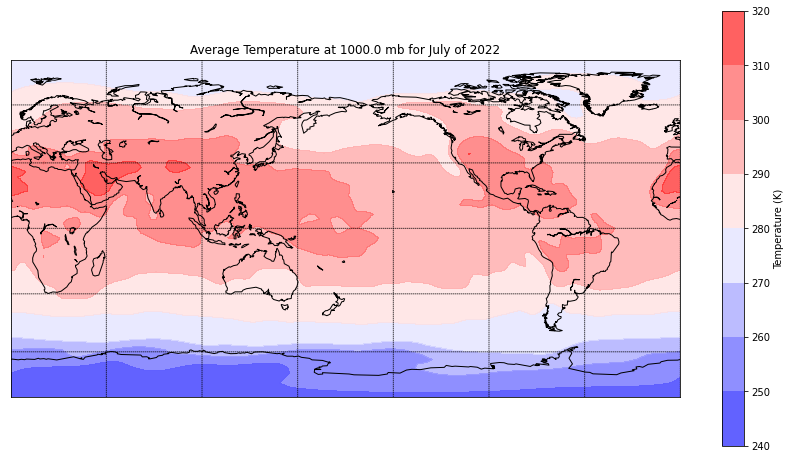

In [6]:
# Plotting temperature data at the highest pressure for the latest month
level_index = 0
plot_temps = temps[date_index][level_index]
plot_date = times[date_index]
plot_prss = levels[level_index]

# Converting lat-lon into plottable variables for contourf
plat, plon = np.meshgrid(lon, lat)

# Plotting temperature data
fig = plt.figure(figsize=(15, 8), edgecolor='w')
# Using basemap to display world map
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=358, )
# Drawing coastlines
m.drawcoastlines()

# Drawing lines of constant latitude
parallels = np.array([-66, -35, 0, 35, 66])
m.drawparallels(parallels)
# Drawing lines of constant longitude
meridians = np.linspace(0, 358, 8)
m.drawmeridians(meridians)

# Plotting temp data
contf = m.contourf(plat, plon, plot_temps, latlon=True, alpha=0.7, cmap='bwr')

# Adding a colorbar
cb = fig.colorbar(contf)
cb.ax.set_ylabel('Temperature (K)')

# Setting plot title
plt.title(f'Average Temperature at {plot_prss} mb for {plot_date.strftime("%B")} of {plot_date.year}')

plt.show()